# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

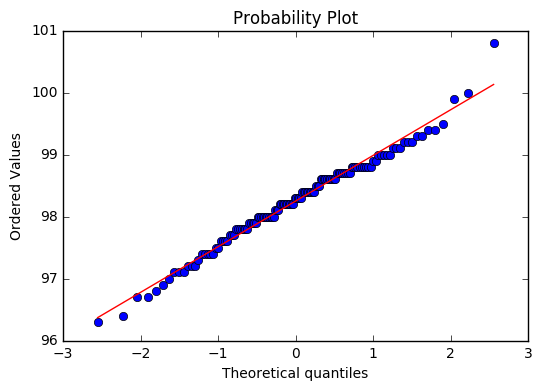

In [1]:
# Question 1) Is the distribution of body temperatures normal? Although this is not a requirement for 
#             CLT to hold (read CLT carefully), it gives us some peace of mind that the population may 
#             also be normally distributed if we assume that this sample is representative of the population.
    
# Answer:  I'll try to answer this visually by constructing a normal probability plot (to help assess whether or not
#          the data set is normally distributed) and also a histogram to estimate the probability distribution of the
#          data set.

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

temp_df = sorted(df.temperature)

# Generate a probability plot of sample data.
res = stats.probplot(df.temperature, plot=plt)
plt.show()

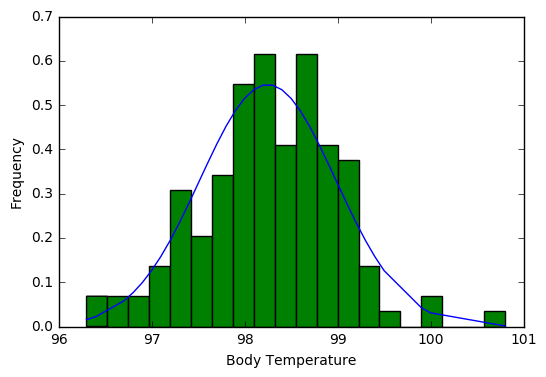

In [2]:

# Generate a probability density function plot (pdf) of the sample data

temp_df = sorted(df.temperature)
plt.plot(temp_df, stats.norm.pdf(temp_df, np.mean(temp_df), np.std(temp_df)))
plt.hist(temp_df, normed=True, bins = 20)
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

In [3]:
#  Based on the graphs, it appears that the data approximates a normal distribution.
#  The normal probability plot show a linear correlation between actual and theoretically 
#  derived normal data which indicate that the normal distribution is a good model for this data set.
    
#  However, there are other special functions I can use to test whether a sample could have
#  been drawn from a normal distribution.  First test if the skew and kurtosis of sample data
#  differ significantly from a normal distribution.

print("Normal skew test stat = %6.3f pvalue = %6.4f" % stats.skewtest(temp_df))

print("Normal kurtosis test stat = %6.3f pvalue = %6.4f" % stats.kurtosistest(temp_df))

print("Normal test stat = %6.3f pvalue = %6.4f" % stats.normaltest(temp_df))

Normal skew test stat = -0.021 pvalue = 0.9830
Normal kurtosis test stat =  1.644 pvalue = 0.1001
Normal test stat =  2.704 pvalue = 0.2587


In [4]:
# Since the p-values of the tests are greater than 0.01, we can not reject the null
# hypothesis which means that our sample has no significant skew and kurtosis of 
# the normal distribution.
        
# In conclusion, the probability density function and normal probability plot
# suggest a normal distribution, and further tests indicate that the data lacks
# significant skewedness nor kurtosis.
    
# Question 2) Is the sample size large? Are the observations independent? Remember that this is 
#             a condition for the CLT, and hence the statistical tests we are using, to apply.
        
# Answer:  The rule of thumb is that the sample N >= 30 in order for the sample size to be
#          considered large. So let's check for the number of data points:
    
total_rows = len(df)
print("Total number of data points is %3i" % total_rows)

Total number of data points is 130


   Since our sample size is greater than 30, it can be considered large enough.
    Also, based on our tests for linearity and distribution, the observations
    can be considered independent.
    
    Question 3) Is the true population mean really 98.6 degrees F? 
                Would you use a one-sample or two-sample test? Why? 
                In this situation, is it appropriate to use the t or z statistic? 
                Now try using the other test. How is the result be different? Why? 
                
    Answer:     To answer this, I'd like to set up the NULL hypothesis that the true mean
                temperature is 98.6 F and the alternative hypothesis would state 
                that the mean population temperature is not 98.6 F.
            
                Ho: True mean population temperature = 98.6 F 
                Ho: μ1 = μ2 
                H1: True mean population temperature ≠ 98.6 F
                H1: μ1 ≠ μ2
                    
                I would use a two-sample test since the sampling distribution
                is approximately normal, just slightly skewed and its observations
                are independent.  Also in this case, I would use a z-test since it's
                more useful when n>30.  Also, since we are testing the sample data against
                a prequalified data point of 98.6F, it is just appropriate to use a z-test.

In [5]:
# Determine the z-score of temperatures using the ztest function
from statsmodels.stats.weightstats import ztest

zscore = ztest(temp_df, value=98.6)
print("Z-score is equal to : %5.4F  p-value equal to: %6.9F" % (abs(zscore[0]),zscore[1]))


Z-score is equal to : 5.4548  p-value equal to: 0.000000049


In [6]:
#  Since the p-value calculated for a two-tailed hypothesis < 0.025
#  we can reject the null hypothesis and therefore the true population 
#  mean temperature ≠ 98.6 F.

#     Question 4) At what temperature should we consider someone's temperature to be "abnormal"? 
#                 Start by computing the margin of error and confidence interval. 

# Calculate the Margin of Error using a 95% confidence level which
# gives a z-score of 1.96
zscore = 1.96
n = 130

# First, calculate the mean and standard deviation of sample data
temp_mean = df.temperature.mean()
temp_std = np.std(temp_df)
prop_err = temp_std/np.sqrt(n)

MoE = abs(zscore*prop_err)
CI = [temp_mean + MoE, temp_mean - MoE]
print("The mean population human body temperature of sample data is %0.2F F +/- %0.2F F" % (temp_mean,MoE))
print("Calculated normal human body temperatures is between %0.2F F and %0.2F F" % (CI[1],CI[0]))

The mean population human body temperature of sample data is 98.25 F +/- 0.13 F
Calculated normal human body temperatures is between 98.12 F and 98.37 F


In [7]:
#  Question 5) Is there a significant difference between males and females in normal temperature? 
#              What test did you use and why? Write a story with your conclusion in the context 
#              of the original problem.
            
#  Answer: Again as before, I'd like to set up the NULL hypothesis first, that there is
#          no significant difference between males and females in normal temperature.
#          The alternative hypothesis would state there is a significant difference between the two.
            
#          Ho: True normal male temperature = normal female temperature 
#          Ho: μ1 = μ2 
#          H1: True normal male temperature ≠ normal female temperature
#          H1: μ1 ≠ μ2
                
#          Also, I will use a t-test in this case since we are clearly comparing
#          two different groups.

# Group by gender and then apply a t-test.
from scipy.stats import ttest_ind

t_test = ttest_ind(df.temperature[df.gender == 'M'], df.temperature[df.gender == 'F'],equal_var=False)

print("T-test p-value is %0.5F " % t_test[1])

male_mean = df.temperature[df.gender=='M'].mean()
female_mean = df.temperature[df.gender=='F'].mean()
print("Male body temperature mean value is %0.5F " % male_mean)
print("Female body temperature mean value is %0.5F " % female_mean)

T-test p-value is 0.02394 
Male body temperature mean value is 98.10462 
Female body temperature mean value is 98.39385 


Conclusion:
    Since the t-test p-value is less than the accepted p-value for a two-tailed hypothesis (0.025),
    we can reject the null hypothesis and therefore there is a statistically significant difference
    between the normal body temperatures of males and females.
